# Inequality constrained problems with the nullspace optimizer

In this notebook, we investigate the use of the null space algorithm for solving equality **and inequality** optimization problems of the form
$$
\newcommand{\x}{{\bf x}}
\newcommand{\g}{{\bf g}}
\newcommand{\<}{\leqslant}
\newcommand{\R}{\mathbb{R}}
\newcommand{\h}{{\bf h}}
\begin{aligned}
    \min_{\x\in V}&  \quad J(\x)\\
    \textrm{s.t.} & \left\{\begin{aligned}
 \g(\x)&=0\\
 \h(\x)&\<0,
        \end{aligned}\right.
\end{aligned}
\label{eqn:equation}
\tag{1}
$$

where $V$ is the optimization set, $J\,:\,V\to \R$ is the objective function and 
$\g\,:\,V\rightarrow \R^p$ and $\h\,:\,V\rightarrow \R^q$ are respectively the
respectively the equality and inequality constraint functionals. 


The basis of the method is to solve an Ordinary Differential Equation (so-called ''null-space gradient flow''),
\begin{equation}
    \label{eqn:ODE}
    \dot{x}(t) =-\alpha_J \xi_J(x(t))-\alpha_C\xi_C(x(t)),
\end{equation}
which is able to solve the optimization problem $\eqref{eqn:equation}$.

The direction
$\xi_J(x(t))$ is called the null space direction, it is the ''best'' locally feasible
descent direction for minimizing $J$ and respecting the constraints. 
The direction
$\xi_C(x(t))$ is called the range space direction, it makes the violated constraints
better satisfied and corrects unfeasible initializations.

$$
\newcommand{\>}{\geqslant}
\newcommand{\DD}{\mathrm{D}}
$$
 The null space direction 
 $\xi_J(x)$ can be interpreted as a generalization
of the gradient in presence of equality and inequality constraints.
It is defined as positively proportional to the solution of the following 
minimization problem:
$$\begin{aligned}
	&  \min_{\xi\in V} \quad\DD J(x)\xi\\
																& \textrm{s.t. }
		\left\{\begin{aligned}
				\DD\g(x)\xi &= 0\\
				\DD\h_{\widetilde{I\,}(x)}(x)\xi& \<0\\
 ||\xi||_V  & \< 1.
			\end{aligned}\right.
	\end{aligned}
$$
where
$\widetilde{I\,}(x)$ is the set of violated or saturated constraints:
$$ \widetilde{I\,}(x):=\{i\in \{1,\dots,q\}\,|\, h_i(x)\>0\}.$$
This minimization problem always has a solution. When the number of constraints is not too large, 
$\xi_J(x)$ can be computed efficiently by mean
of a dual subproblem.

 The range space direction $\xi_C(x)$ is a Gauss-Newton direction for cancelling the violated constraints
 of $\widetilde{I\,}(x)$:
$$
\newcommand{\CC}{\mathrm{C}}
\xi_C(x):=\DD\CC_{\widetilde{I\,}(x)}^T(\DD\CC_{\widetilde{I\,}(x)} \DD\CC_{\widetilde{I\,}(x)}^T)^{-1}\CC_{\widetilde{I\,}(x)}(x),
\textrm{ with }
 \CC_{\widetilde{I\,}}(x):=\begin{bmatrix} \g(x) & \h_{\widetilde{I\,}(x)}(x)\end{bmatrix}^T,\, \h_{\widetilde{I\,}(x)}(x):=(h_i(x))_{i
 \in \widetilde{I\,}(x)}.
$$
It is orthogonal to $\xi_J(x)$ and satisfies $\DD\CC_{\widetilde{I\,}(x)}\xi_C(x)=\CC_{\widetilde{I\,}(x)}(x)$ which 
entails an exponential decrease of the violation of the constraints at rate at least $e^{-\alpha_C t}$ for the solution
$x(t)$ of \eqref{eqn:equation}:
$$\forall t\>0,\,  \g(x(t))= \g(x(0)) e^{-\alpha_C t}\textrm{ and }
\h(x(t)) \< \max(0,\h(x(0))e^{-\alpha_C t}.$$



# A first optimization program

$$\newcommand{\R}{\mathbb{R}}$$
We consider the following optimization program in $\R^2$:

$$\newcommand{\<}{\leq}
\begin{aligned} \min_{(x_0,x_1)\in\mathbb{R}^2} & \quad (x_0+1)^2+(x_1+1)^2 \\
s.t. &\quad  \left\{ \begin{aligned} x_0^2+x_1^2-1 & \< 0\\
                             x_0+x_1-1 & \< 0 \\
                             -x_1-0.7 & \<0
                             \end{aligned}\right.
\end{aligned}$$
 

In order to solve the optimization problem, we use the function `nlspace_solve` whose prototype is 
```python
from nullspace_optimizer import nlspace_solve

# Define problem

results = nlspace_solve(problem: Optimizable, params=None, results=None)
```
The input variables are 
-  `problem` : an `Optimizable` object described below. This variable contains all the information about the optimization problem to solve (objective and constraint functions, derivatives...)
- `params`  : (optional) a dictionary containing algorithm parameters.

- `results` : (optional) a previous output of the `nlspace_solve` function.         The optimization will then keep going from the last input of           the dictionary `results['x'][-1]`. This is useful when one needs to restart an optimization after an interruption.

The optimization routine `nlspace_solve` returns the dictionary `opt_results` which contains various information about the optimization path, including the values of the optimization variables `results['x']`.
    
    
 In our particular optimization test case in $\R^n$ with $n=2$, we use the  `EuclideanOptimizable` class which inherits `Optimizable` which simplifies the definition of the optimization program (the inner product is specified by default). 
We allow the user to specify the initialization in the constructor `__init__`.

Fill in the definition below with the right values for solving the above optimization program.

In [1]:
from nullspace_optimizer import *


class problemeSimple(EuclideanOptimizable):
    def __init__(self, xinit):
        super().__init__(n=2)
        self.xinit = xinit

        self.nconstraints = 0
        self.nineqconstraints = 3

    def x0(self):
        return self.xinit

    def J(self, x):
        return (x[0]+1)**2+(x[1]+1)**2

    def G(self, x):
        return []

    def H(self, x):
        return [x[0]**2+x[1]**2-1**2,
                x[0]+x[1]-1,
                -x[1]-0.7]

    def dJ(self, x):
        return [2*(x[0]+1), 2*(x[1]+1)]

    def dG(self, x):
        return []

    def dH(self, x):
        return [[2*x[0], 2*x[1]],
                [1, 1],
                [0, -1]]


Let us draw the optimization domain and the objective function with the function `draw` provided by the package:

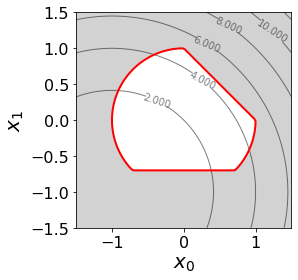

In [2]:
import nullspace_optimizer.examples.draw as draw

draw.drawProblem(problemeSimple([0, 0]), [-1.5, 1.5], [-1.5, 1.5])
# drawProblem(problem : EuclideanOptimizable, [xmin,xmax], [ymin,ymax] )

The white area is the feasible domain. 


    

3\. Solve the optimization program with the initializations $[1.25,0]$, $[0,-1.2]$, $[1,-1]$, $[0.7,1.2]$, $[-1,1]$.

In [3]:
def run_problems(**other_params):
    xinits = ([1.25, 0], [0, -1.2], [1, -1], [0.7, 1.2], [-1, 1])
    problems = [problemeSimple(xinit=x0) for x0 in xinits]
    params = {'dt': 0.05, 'alphaC': 0.2, 'alphaJ': 1, 'maxtrials': 1, 'debug': -1}
    params.update(other_params)
    return [nlspace_solve(pb, params) for pb in problems]

results = run_problems()




Optimization completed.
70. J=0.1717 G=[] H=[-1.268e-08,-2.414,4.435e-11]


Optimization completed.
37. J=0.1717 G=[] H=[6.328e-08,-2.414,2.733e-08]


Optimization completed.
80. J=0.1717 G=[] H=[-7.087e-08,-2.414,-1.05e-08]


Optimization completed.
88. J=0.1717 G=[] H=[1.65e-08,-2.414,1.817e-08]


Optimization completed.
74. J=0.1717 G=[] H=[-7.214e-09,-2.414,-9.396e-09]


Utiliser le code ci-dessous pour afficher les trajectoires optimisées.

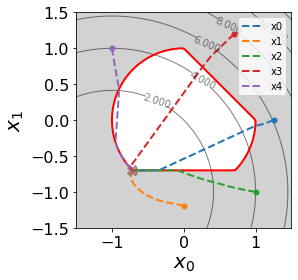

In [4]:
draw.drawProblem(problemeSimple([0, 0]), [-1.5, 1.5], [-1.5, 1.5])
for i, r in enumerate(results):
    draw.drawData(r, f'x{i}', f'C{i}', x0=True, xfinal=True, initlabel=None)

If one wishes to understand the nature of the trajectories, it is useful to look at the evolution of the Lagrange multipliers along the optimization trajectories. These are saved in `results['muls']`. 

Use the following code to display the multipliers and comment with respect to the trajectories.


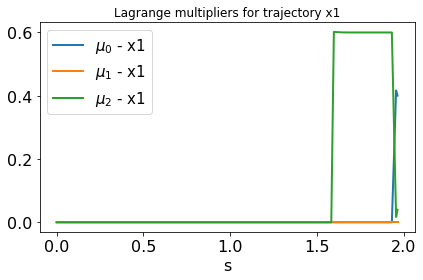

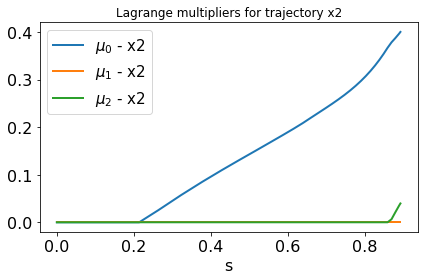

In [5]:
draw.figure()
draw.drawMuls(results[0], 'x1')
draw.legend()
draw.title('Lagrange multipliers for trajectory x1')
draw.show()
draw.figure()
draw.drawMuls(results[1], 'x2')
draw.legend()
draw.title('Lagrange multipliers for trajectory x2')

How do you interpret:
- the fact that $\mu_1,\mu_2=0$ in the beginning of the optimization
- the final discontinuities 
- are the value displayed below consistent ?

In [6]:
for x in results:
    print(x['muls'][-1])

[0.40028026 0.         0.03960764]
[0.40027974 0.         0.03960744]
[0.40028096 0.         0.03960663]
[0.4002801  0.         0.03960767]
[0.40028   0.        0.0396081]


More exploration:
- Change the value of the parameters $\alpha_J,\alpha_C$ and $\Delta t$. How the optimization trajectories are modified ?
- Solve the following problem:
$$\begin{aligned} \min_{(x_0,x_1)\in\mathbb{R}^2} & \quad x_0 \\
s.t. &\quad  \left\{ \begin{aligned} 0.5^2-x_0^2-x_1^2 & \< 0\\
                             -1-x_0 & \< 0
                             \end{aligned}\right.
\end{aligned}$$
Test with the initializations $[1.25,0], [0,-1.2], [1,0.3], [0.7,-0.2], [-1.3,1]$. Comment on the evolution of the Lagrange multipliers.

In [7]:
class problemeSimple2(EuclideanOptimizable):
    def __init__(self, xinit):
        super().__init__(n=2)
        self.xinit = xinit

        self.nconstraints = 0
        self.nineqconstraints = 2

    def x0(self):
        return self.xinit

    def J(self, x):
        return x[0]

    def G(self, x):
        return []

    def H(self, x):
        return [0.5**2-x[0]**2-x[1]**2,
                -x[0]-1]

    def dJ(self, x):
        return [1, 0]

    def dG(self, x):
        return []

    def dH(self, x):
        return [[-2*x[0], -2*x[1]],
                [-1, 0]]

def run_problems(**other_params):
    xinits = ([1.25, 0], [0, -1.2], [1, 0.3], [0.7, -0.2], [-1.3, 1])
    problems = [problemeSimple2(xinit=x0) for x0 in xinits]
    params = {'dt': 0.01, 'alphaC': 1, 'alphaJ': 1, 'maxtrials': 1, 'debug': -1}
    params.update(other_params)
    return [nlspace_solve(pb, params) for pb in problems]


results = run_problems()






Optimization completed.
76. J=0.5 G=[] H=[-7.5e-11,-1.5]


Optimization completed.
101. J=-1 G=[] H=[-2.19,-1e-10]


Optimization completed.
207. J=-1 G=[] H=[-1,3.895e-09]


Optimization completed.
182. J=-1 G=[] H=[-1,6.331e-09]


Optimization completed.
35. J=-1 G=[] H=[-1.75,1e-08]


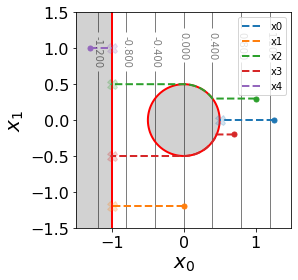

In [8]:
import nullspace_optimizer.examples.draw as draw
draw.ion()
draw.drawProblem(problemeSimple2([0, 0]), [-1.5, 1.5], [-1.5, 1.5])
for i, r in enumerate(results):
    draw.drawData(r, f'x{i}', f'C{i}', x0=True, xfinal=True, initlabel=None)


Display the Lagrange multiplier associated to the trajectory `x0`, `x2` and comment on their evolution.

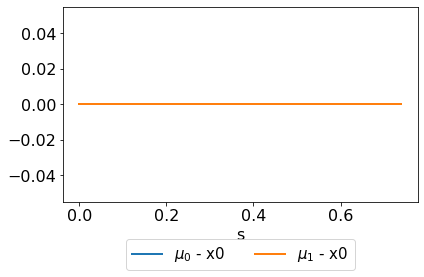

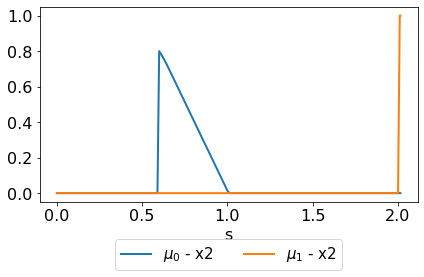

In [9]:
draw.drawMuls(results[0],'x0')
import matplotlib.pyplot as plt
plt.figure()
draw.drawMuls(results[2],'x2')

What would have happened if the algorithm would have kept projected the trajectories on the constraint ? 